In [1]:
#import paper_plots as carlosplt
from pymongo import MongoClient
import stat_tests as stats
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import csv
from matplotlib.font_manager import FontProperties
import seaborn as sns
import laplace_tests as lptests
import statsmodels.api as sm
import datetime

In [2]:
with open('./vendors/debian/cache/src2dsa') as fp:
    src2dsa=json.load(fp)
with open('./vendors/debian/cache/dsa2cve') as fp:
    dsa2cve=json.load(fp)
with open('./vendors/debian/cache/src2month') as fp:
    src2month=json.load(fp)
with open('./vendors/debian/cache/pkg_with_cvss') as fp:
    pkg_with_cvss=json.load(fp)
with open('./vendors/debian/cache/dsainfo') as fp:
    dsainfo=json.load(fp)
with open('./vendors/debian/cache/src2sloccount') as fp:
    src2sloccount=json.load(fp)

with open('./vendors/debian/src2month_DLA.json') as fp:
    src2dla=json.load(fp)

client = MongoClient('mongodb://localhost:27017/')
db = client.cvedb

# Get the collection object
# Here name of the database is "states"

collection  = db.cves

# Make a query to list all the documents

cvedicttemp=collection.find()

In [3]:
cvedict=dict()
for key in cvedicttemp:
    cvedict[key['id']]=key

In [4]:
single_src2month=dict()
single_pkg_with_cvss=dict()

In [5]:
# Number counted once
cve_once=dict()
repeat_count=dict()
for dsa in dsa2cve:
    for cve in dsa2cve[dsa]:
        if cve not in cve_once:
            date1=dsainfo[dsa][1]
            date1 = datetime.datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')
            try:
                date2=cvedict[cve]['Published']
                if date1<date2:
                    date=date1
                else:
                    date=date2
                cve_once[cve]=date
                repeat_count[cve]=[date1]
                continue
            except KeyError:
                cve_once[cve]=date1
                repeat_count[cve]=[date1]
                continue
        if cve in cve_once:
            date1=dsainfo[dsa][1]
            date1 = datetime.datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')
            date2=cve_once[cve]
            if date1<date2:
                date=date1
            else:
                date=date2    
            cve_once[cve]=date
            repeat_count[cve].append(date1)

In [6]:
cve2src=dict()
for cve in cve_once:
    cve2src[cve]=[]
    for src in src2dsa:
        for dsa in src2dsa[src]:
            if cve in dsa2cve[str(dsa)]:
                if src not in cve2src[cve]:
                    cve2src[cve].append(src)

In [7]:
# Here we start the plotting        
years=18

num_low = [0] * (years+1) * 12
num_med = [0] * (years+1) * 12
num_high = [0] * (years+1) * 12
num_udef = [0] * (years+1) * 12
total = [0] * (years+1) * 12
for i in cve_once:
    year = cve_once[i].year
    month = cve_once[i].month
    index = (year-2000)*12+month-1
    if year-2000 > years:
        continue
    total[index] += 1
    try:
        cvss=cvedict[i]['cvss']
        if cvss<0.0 or cvss>10.0:
            print('Unexpected')
            num_udef[index] += 1
        if cvss<4.0:        
            num_low[index] += 1
        elif cvss<7.0:
            num_med[index] += 1
        else:    
            num_high[index] += 1
    except:
        num_udef[index] += 1
print(total)
print(sum(total))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 4, 13, 17, 5, 9, 6, 5, 4, 7, 5, 7, 7, 12, 14, 3, 1, 14, 9, 29, 17, 23, 27, 32, 31, 8, 42, 21, 16, 36, 26, 22, 29, 7, 9, 13, 29, 26, 21, 27, 12, 20, 14, 36, 21, 25, 20, 45, 59, 30, 19, 31, 40, 21, 54, 62, 59, 66, 56, 73, 26, 36, 35, 81, 45, 42, 46, 51, 40, 19, 26, 38, 19, 22, 50, 43, 40, 59, 47, 25, 45, 38, 45, 35, 38, 50, 46, 36, 31, 28, 41, 30, 46, 32, 36, 43, 37, 34, 67, 66, 35, 50, 46, 35, 53, 47, 41, 45, 34, 49, 17, 27, 21, 44, 39, 57, 35, 31, 41, 37, 60, 47, 81, 40, 65, 38, 41, 47, 36, 47, 27, 29, 69, 48, 45, 35, 41, 59, 42, 49, 25, 40, 37, 19, 27, 41, 60, 47, 77, 88, 61, 47, 45, 65, 67, 66, 54, 65, 69, 90, 44, 38, 66, 57, 40, 95, 60, 80, 70, 68, 65, 93, 73, 55, 91, 69, 60, 86, 69, 73, 115, 99, 115, 91, 99, 86, 111, 114, 104, 42, 64, 106, 172, 73, 106, 113, 68, 86, 146, 141, 198, 106, 95, 106, 117, 67, 93, 161, 56, 79, 95, 42, 59, 54, 51, 82]
10716


[0, 0.07692307692307693, 0.1276595744680851, 0.09615384615384616, 0.11148648648648649, 0.03333333333333333, 0.07422680412371134, 0.014957264957264958, 0.002188183807439825, 0.012589928057553957, 0.037037037037037035, 0.012544802867383513, 0.003929273084479371, 0.004341534008683068, 0.021108179419525065, 0.0389908256880734, 0.005235602094240838, 0.002127659574468085, 0.0041841004184100415]


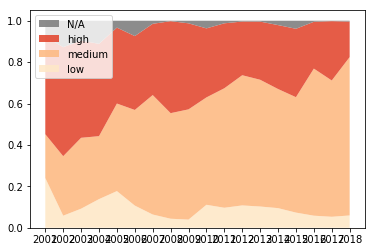

In [8]:
# Plot severity percentage
pal = ['#fee8c8', '#fdbb84', '#e34a33', 'grey']
x = range(2001, 2001 + years)

per_low = [0] * (years+1)
per_med = [0] * (years+1)
per_high = [0] * (years+1)
per_udef = [0] * (years+1)

labels_cvss = ['low', 'medium', 'high', 'N/A']
        
for i in range(years + 1):
    try:
        per_low[i] = sum(num_low[i*12:i*12+12])/sum(total[i*12:i*12+12])
        per_med[i] = sum(num_med[i*12:i*12+12])/sum(total[i*12:i*12+12])
        per_high[i] = sum(num_high[i*12:i*12+12])/sum(total[i*12:i*12+12])
        per_udef[i] = sum(num_udef[i*12:i*12+12])/sum(total[i*12:i*12+12])
    except ZeroDivisionError:
        per_low[i] = 0
        per_med[i] = 0
        per_high[i] = 0
        per_udef[i] = 0

h = plt.stackplot(x, [per_low[1:], per_med[1:], per_high[1:], per_udef[1:]], colors = pal, alpha=0.9, labels = labels_cvss)
plt.xticks(x)
plt.legend(loc='upper left', handles = h[::-1])
#carlosplt.post_paper_plot(True,True,True)
print(per_udef)
plt.show()

In [9]:
# Next we filter the vulnerabilities by severity (for use later)
#carlosplt.pre_paper_plot()
l=0
m=0
h=1
udef=0

filtered=[0]*len(total)
        
for i in range(len(total)):
    tempp=0
    if l:
        tempp += num_low[i]
    if m:
        tempp += num_med[i]
    if h:
        tempp += num_high[i]
    if udef:
        tempp += num_udef[i]
    filtered[i]+=tempp  

linux :  948 2 ('linux', 160)
chromium-browser :  799 1 ('chromium-browser', 303)
firefox-esr :  739 3 ('firefox-esr', 147)
icedove :  600 5 ('icedove', 127)
php7 :  386 19 ('php7', 28)
openjdk :  309 7 ('openjdk', 89)
wireshark :  303 14 ('wireshark', 43)
xulrunner :  211 833 ('xulrunner', 0)
mysql-transitional :  209 12 ('mysql-transitional', 47)
imagemagick :  195 6 ('imagemagick', 99)
iceape :  178 831 ('iceape', 0)
xen :  172 8 ('xen', 59)
tcpdump :  156 4 ('tcpdump', 131)
wordpress :  147 13 ('wordpress', 46)
openssl :  134 29 ('openssl', 13)
tiff :  127 10 ('tiff', 55)
qemu :  121 16 ('qemu', 36)
mariadb-10.1 :  116 11 ('mariadb-10.1', 51)
ruby2.3 :  84 15 ('ruby2.3', 39)
graphicsmagick :  82 9 ('graphicsmagick', 56)
one_only =  597
one_plus =  681
Total number of packages =  1278
Total:  12192


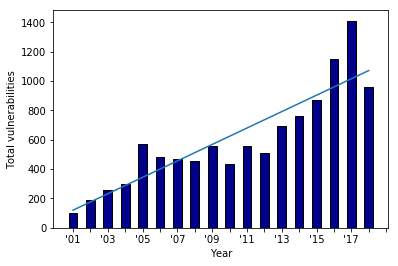

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     62.36
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           6.56e-07
Time:                        15:02:36   Log-Likelihood:                -115.36
No. Observations:                  18   AIC:                             234.7
Df Residuals:                      16   BIC:                             236.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.0175     70.519      1.702      0.1

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [10]:
# We look at vulnerabilities per package

src2sum = dict()
src2year = dict()
src2lastyears = dict()
src2dens = dict()
src2month_temp = dict()
year_sum = [0]*(years+1)
year_num = [0]*(years+1)

for src in src2dsa:
    src2year[src]=[0]*(years+1)

for cve in cve_once:
    try:
        year=cve_once[cve].year
        month=cve_once[cve].month
        pkgs=cve2src[cve]
    except KeyError:
        continue
    if year-2000 > years:
        continue
    year_sum[year-2000]+=1
    for pkg in pkgs:
        src2year[pkg][year-2000]+=1 

for src in src2year:
    src2sum[src]=sum(src2year[src])
    src2lastyears[src]=sum(src2year[src][-2:])
    i=0
    for num in src2year[src]:
        if num>0:
            year_num[i]+=1
        i+=1
    
# Print top 20 packages in total and last 2 year (2017-2018)
sorted_x = sorted(src2sum.items(), key=lambda kv: kv[1], reverse=True)
sorted_y = sorted(src2lastyears.items(), key=lambda kv: kv[1], reverse=True)
for i in sorted_x[:20]:
    pkg=i[0]
    rank_last=1
    for j in sorted_y:
        if j[0]==pkg:
            break
        else:
            rank_last+=1
    print(pkg, ': ', i[1], rank_last, sorted_y[rank_last-1] )
        
#calc total
one_only=0
one_plus=0
for src in src2year:
    if sum(src2year[src])==1:
        one_only+=1
    elif sum(src2year[src])>1:
        one_plus+=1
        
print('one_only = ', one_only)
print('one_plus = ', one_plus)
print('Total number of packages = ', one_only+one_plus)


values = sorted(src2sum.values(),reverse=True)
#print(values)
keys = list(sorted(src2sum, key=src2sum.__getitem__, reverse=True))

n = len(year_sum)
yearsx = []
for i in range(1,years+1):
    if i%2==1:
        yearsx.append('\''+str(i).zfill(2))
    else:
        yearsx.append('')
    
x = range(years)
width = 1/2
plt.bar(x, year_sum[1:], width, color='darkblue', edgecolor='black')
#plt.bar(x, average_per_year, width)
plt.xticks(np.arange(0,n),yearsx)
plt.ylabel('Total vulnerabilities')
plt.xlabel('Year')
#carlosplt.post_paper_plot(True,True,True)        
sum_all = sum(values)
print("Total: ", sum_all)

## Linear regression model
X = sm.add_constant(x)
y = year_sum[1:]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
plt.plot(predictions)
plt.show()
print(model.summary())
#print(model.summary().as_latex())

package number =681... 681
Spearman correlation:  SpearmanrResult(correlation=nan, pvalue=nan)


No handles with labels found to put in legend.


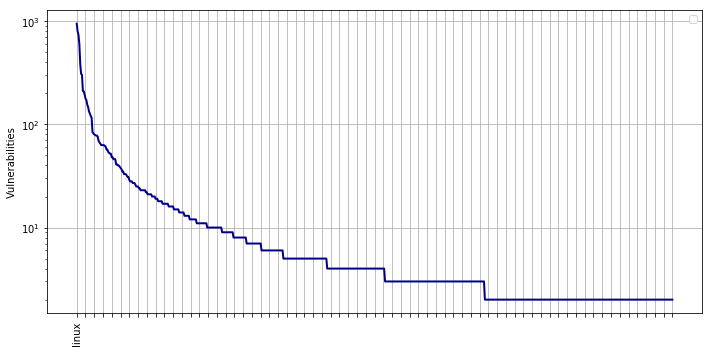

In [18]:
src2sum_g2=dict()
for src in src2sum:
    if src2sum[src]>1:
        src2sum_g2[src]=src2sum[src]
values = sorted(src2sum_g2.values(),reverse=True)
#print(values)
keys = list(sorted(src2sum_g2, key=src2sum_g2.__getitem__, reverse=True))

density = []
density_keys=[]
size = []
size_dens = []

for pkg in keys:
    try:
        size.append(src2sloccount[pkg][0]/1000)
    except (KeyError):
        size.append(0)

j=0
for pkg in keys:
    try:
        if (src2sloccount[pkg][0])>0:
            density.append((values[j]/src2sloccount[pkg][0])*1000)
            density_keys.append(pkg)
            src2dens[pkg] = (values[j]/src2sloccount[pkg][0])*1000
            size_dens.append(src2sloccount[pkg][0])
    except(KeyError):
        pass
j += 1
i = 0
few_keys = []
#print(keys)
for k in keys:
    if (i==0):
        few_keys.append(k)
        i+=1
    if (i==10):
        i = 0

print('package number =' + str(len(values)) + '... ' + str(len(keys)))
#carlosplt.pre_paper_plot(True)
#plt.style.use('ggplot')

print('Spearman correlation: ',stats.spearmanr(values,size))
with open('sizes.txt', 'w') as thefile:
    for item in size:
        thefile.write("%.3f\n" % item)

plt.figure(figsize=(10,5))
plt.plot(values, color='darkblue', lw = 2)
#plt.plot(size, 'ro', color='darkred', lw = 2, label='Size in KSLoC')
plt.xticks(np.arange(0,len(src2sum_g2),10.0),few_keys, rotation="vertical")
plt.ylabel('Vulnerabilities')
plt.yscale('log')
plt.grid()
#plt.xscale('log')
plt.tight_layout()
plt.legend()
#carlosplt.post_paper_plot(True,True,True)
plt.show()

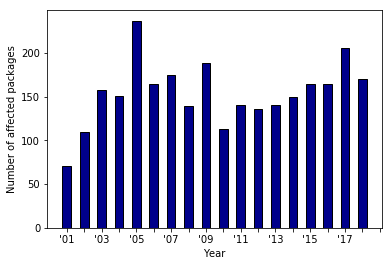

Slope: [0.30890256 0.80247773]


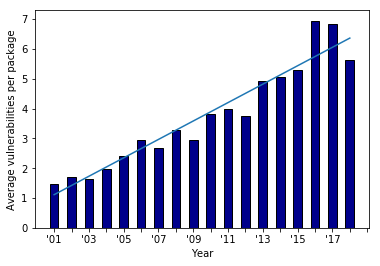

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           3.91e-10
Time:                        15:02:37   Log-Likelihood:                -12.213
No. Observations:                  18   AIC:                             28.43
Df Residuals:                      16   BIC:                             30.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1114      0.229      4.856      0.0

In [12]:
## Number of affected packages
n = len(year_sum)
yearsx = []
for i in range(1,years+1):
    if i%2==1:
        yearsx.append('\''+str(i).zfill(2))
    else:
        yearsx.append('')
    
x = range(years)
width = 1/2
plt.bar(x, year_num[1:], width, color='darkblue', edgecolor='black')
plt.xticks(np.arange(0,n),yearsx)
plt.ylabel('Number of affected packages')
plt.xlabel('Year')
#carlosplt.post_paper_plot(True,True,True)
plt.show()

average_per_year = [0] * (years+1)
for j in range(years+1):
    try:
        average_per_year[j] = year_sum[j]/float(year_num[j])
    except ZeroDivisionError:
        average_per_year[j]=0
        
x_values = list(range(1,years+1))
slope = np.polyfit(x_values,average_per_year[1:],1)
        
print('Slope: ' + str(slope))        
n = len(year_sum)
x = range(years)
width = 1/2
#plt.bar(x, year_sum, width)
plt.bar(x, average_per_year[1:], width, color='darkblue', edgecolor='black')
plt.xticks(np.arange(0,n),yearsx)
plt.ylabel('Average vulnerabilities per package')
plt.xlabel('Year')
#carlosplt.post_paper_plot(True,True,True)
## Linear regression
X = sm.add_constant(x)
y = average_per_year[1:]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
plt.plot(predictions)
plt.show()
print(model.summary())
#print(model.summary().as_latex())

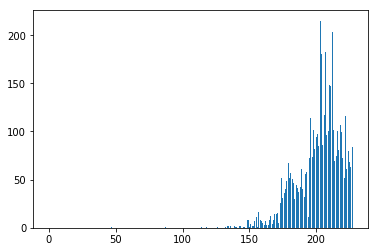

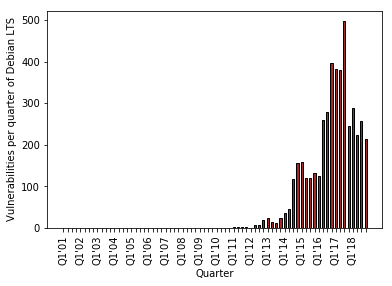

20
20
20
20
20


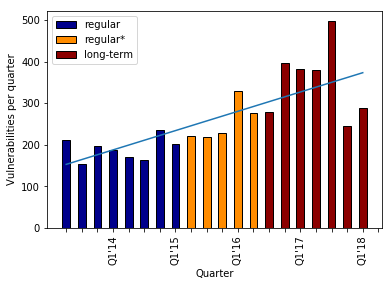

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     23.29
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           0.000136
Time:                        15:02:39   Log-Likelihood:                -109.87
No. Observations:                  20   AIC:                             223.7
Df Residuals:                      18   BIC:                             225.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.1143     26.723      5.730      0.0

In [13]:
quarter_num = years*4
# Get LTS and plot

cve_once_dla=dict()

for src in src2dla:
    for dla in src2dla[src]:
        for cve in dla[0]:
            if cve not in cve_once_dla:
                year1 = dla[1][0]
                month1 = dla[1][1]
                date1 = str(year1)+'-'+str(month1)
                date1 = datetime.datetime.strptime(date1, '%Y-%m')
            try:
                date2=cvedict[cve]['Published']
                if date1<date2:
                    date=date1
                else:
                    date=date2
                cve_once_dla[cve]=date
                continue
            except KeyError:
                cve_once_dla[cve]=date1
                continue
        if cve in cve_once_dla:
            year1 = dla[1][0]
            month1 = dla[1][1]
            date1 = str(year1)+'-'+str(month1)
            date1 = datetime.datetime.strptime(date1, '%Y-%m')
            date2 = cve_once_dla[cve]
            if date1<date2:
                date=date1
            else:
                date=date2    
            cve_once_dla[cve]=date
            
## Plot for wheezy
quarter_sum = [0] * quarter_num

total_DLA=[0]*(years+1)*12

num_low_DLA = [0] * (years+1) * 12
num_med_DLA = [0] * (years+1) * 12
num_high_DLA = [0] * (years+1) * 12
num_udef_DLA = [0] * (years+1) * 12
for i in cve_once_dla:
    year = cve_once_dla[i].year
    month = cve_once_dla[i].month
    index = (year-2000)*12+month-1
    if year-2000 > years:
        continue
    total_DLA[index] += 1
    try:
        cvss=cvedict[i]['cvss']
        if cvss<0.0 or cvss>10.0:
            print('Unexpected')
            num_udef_DLA[index] += 1
        if cvss<4.0:        
            num_low_DLA[index] += 1
        elif cvss<7.0:
            num_med_DLA[index] += 1
        else:    
            num_high_DLA[index] += 1
    except:
        num_udef_DLA[index] += 1

l=1
m=1
h=1
udef=1

filtered_DLA=[0]*len(total_DLA)
        
for i in range(len(total_DLA)):
    tempp=0
    if l:
        tempp += num_low_DLA[i]
    if m:
        tempp += num_med_DLA[i]
    if h:
        tempp += num_high_DLA[i]
    if udef:
        tempp += num_udef_DLA[i]
    filtered_DLA[i]+=tempp          
        
ltslist = filtered_DLA

totalLTS = ltslist
plt.bar([i for i in range(len(ltslist))],ltslist)
plt.show()

quartersx = []
for i in range(1,years+1):
    for j in range(1,5):
        if j==1:
            quartersx.append('Q' + str(j)+'\''+str(i).zfill(2))
        else:
            quartersx.append(' ')
    
for j in range(quarter_num):
    quarter_sum[j] =  sum(total[12+(3*j):12+3*(j+1)])

LTS_quarter = []
    
for j in range(quarter_num):
    temp = sum(totalLTS[12+(3*j):12+3*(j+1)])
    LTS_quarter.append(temp)

## Print all LTS
cut = 12*4+1
n = len(quarter_sum)
x = range(quarter_num)
width = 1/2

plt.bar(x, LTS_quarter, width, color='brown', label='regular support', edgecolor='black')
plt.xticks(np.arange(0,n),quartersx, rotation="vertical")
plt.ylabel('Vulnerabilities per quarter of Debian LTS')
plt.xlabel('Quarter')
#carlosplt.post_paper_plot(True,True,True)
plt.show()
    
## Filter only wheezy:
quarter_sum_regular = [0] * (12*4+1) + quarter_sum[12*4+1:12*4+9] + [0] * 12
quarter_sum_errors = [0] * (12*4 + 9) + quarter_sum[12*4+9:12*4+9+5] + [0] * 7
LTS_quarter = [0] * (15*4+2) + LTS_quarter[15*4+2:-3]
whole_w = quarter_sum_regular[:-12] + quarter_sum_errors[12*4+9:-7] + LTS_quarter[15*4+2:]
    
#print(quarter_sum_errors)
cut = 12*4+1
n = len(quarter_sum) - cut
x = range(quarter_num-cut-3)
width = 1/2       
print(len(x))
print(len(quarter_sum_regular[cut:]))
print(len(quarter_sum_errors[cut:]))
bar1 = plt.bar(x, quarter_sum_regular[cut:], width, color='darkblue', label='regular', edgecolor='black')
bar12 = plt.bar(x, quarter_sum_errors[cut:], width, color='darkorange', label='regular*', edgecolor='black')
bar2 = plt.bar(x, LTS_quarter[cut:], width, color='darkred', label ='long-term', edgecolor='black')
plt.legend(handles=[bar1, bar12, bar2])
    
plt.xticks(np.arange(0,n),quartersx[cut:], rotation="vertical")
plt.ylabel('Vulnerabilities per quarter')
plt.xlabel('Quarter')
#carlosplt.post_paper_plot(True,True,True)
## Linear Regression
print(len(x))
print(len(whole_w[cut:]))
X = sm.add_constant(x)
y = whole_w[cut:]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
plt.plot(predictions)
plt.show()
print(model.summary())
#print(model.summary().as_latex())

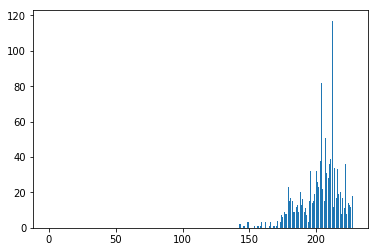

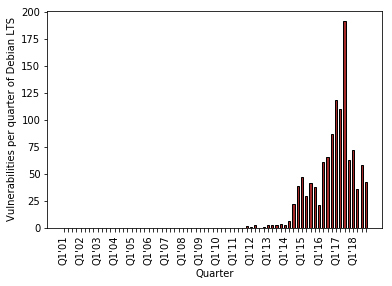

20
20
20
20
20


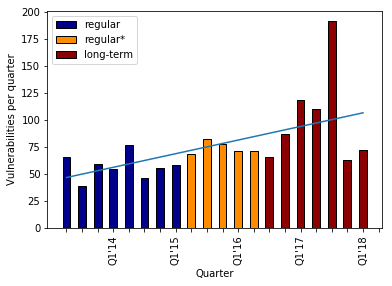

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     8.402
Date:                Wed, 30 Oct 2019   Prob (F-statistic):            0.00957
Time:                        15:02:41   Log-Likelihood:                -94.032
No. Observations:                  20   AIC:                             192.1
Df Residuals:                      18   BIC:                             194.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.8571     12.104      3.871      0.0

In [14]:
## Plot for wheezy ONLY HIGH severity
quarter_sum = [0] * quarter_num

l=0
m=0
h=1
udef=0

filtered_DLA=[0]*len(total_DLA)
        
for i in range(len(total_DLA)):
    tempp=0
    if l:
        tempp += num_low_DLA[i]
    if m:
        tempp += num_med_DLA[i]
    if h:
        tempp += num_high_DLA[i]
    if udef:
        tempp += num_udef_DLA[i]
    filtered_DLA[i]+=tempp          
        
ltslist = filtered_DLA

totalLTS = ltslist
plt.bar([i for i in range(len(ltslist))],ltslist)
plt.show()

quartersx = []
for i in range(1,years+1):
    for j in range(1,5):
        if j==1:
            quartersx.append('Q' + str(j)+'\''+str(i).zfill(2))
        else:
            quartersx.append(' ')
    
for j in range(quarter_num):
    quarter_sum[j] =  sum(filtered[12+(3*j):12+3*(j+1)])

LTS_quarter = []
    
for j in range(quarter_num):
    temp = sum(totalLTS[12+(3*j):12+3*(j+1)])
    LTS_quarter.append(temp)

## Print all LTS
cut = 12*4+1
n = len(quarter_sum)
x = range(quarter_num)
width = 1/2

plt.bar(x, LTS_quarter, width, color='brown', label='regular support', edgecolor='black')
plt.xticks(np.arange(0,n),quartersx, rotation="vertical")
plt.ylabel('Vulnerabilities per quarter of Debian LTS')
plt.xlabel('Quarter')
#carlosplt.post_paper_plot(True,True,True)
plt.show()
    
## Filter only wheezy:
quarter_sum_regular = [0] * (12*4+1) + quarter_sum[12*4+1:12*4+9] + [0] * 12
quarter_sum_errors = [0] * (12*4 + 9) + quarter_sum[12*4+9:12*4+9+5] + [0] * 7
LTS_quarter = [0] * (15*4+2) + LTS_quarter[15*4+2:-3]
whole_w = quarter_sum_regular[:-12] + quarter_sum_errors[12*4+9:-7] + LTS_quarter[15*4+2:]
    
#print(quarter_sum_errors)
cut = 12*4+1
n = len(quarter_sum) - cut
x = range(quarter_num-cut-3)
width = 1/2       
print(len(x))
print(len(quarter_sum_regular[cut:]))
print(len(quarter_sum_errors[cut:]))
bar1 = plt.bar(x, quarter_sum_regular[cut:], width, color='darkblue', label='regular', edgecolor='black')
bar12 = plt.bar(x, quarter_sum_errors[cut:], width, color='darkorange', label='regular*', edgecolor='black')
bar2 = plt.bar(x, LTS_quarter[cut:], width, color='darkred', label ='long-term', edgecolor='black')
plt.legend(handles=[bar1, bar12, bar2])
    
plt.xticks(np.arange(0,n),quartersx[cut:], rotation="vertical")
plt.ylabel('Vulnerabilities per quarter')
plt.xlabel('Quarter')
#carlosplt.post_paper_plot(True,True,True)
## Linear Regression
print(len(x))
print(len(whole_w[cut:]))
X = sm.add_constant(x)
y = whole_w[cut:]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
plt.plot(predictions)
plt.show()
print(model.summary())
#print(model.summary().as_latex())